# Community detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
import pickle
from sklearn.metrics import pairwise_distances, pairwise_kernels
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF
import networkx as nx
from tqdm.notebook import tqdm

import os
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning) 

import pandas as pd

import copy


import hypernetx as hnx

import pygenstability as pgs
from pygenstability import plotting

In [2]:
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

In [3]:
import scipy as sc
import scipy.sparse as sp

In [4]:
from networkx.algorithms import community

In [5]:
import community as community_louvain

In [6]:
# CHECKPOINT
edges_li = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_LI.pkl', 'rb'))
edges_lmi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_LMI.pkl', 'rb'))
edges_umi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_UMI.pkl', 'rb'))
edges_hi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_HI.pkl', 'rb'))

In [7]:
# CHECKPOINT
Adj2_li = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_li.pkl', 'rb'))
Adj2_lmi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_lmi.pkl', 'rb'))
Adj2_umi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_umi.pkl', 'rb'))
Adj2_hi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_hi.pkl', 'rb'))

In [8]:
def get_adjacency(H):
    
    """ Construct weighted adjacency matrix for HyperGraph H
    
    Arguments
    H : Hypernetx hypergraph object
    
    """

    incidence = H.incidence_matrix().toarray()
    
    # hyperedge adjacency matrix
    C = np.matmul(incidence.T,incidence)
    A = np.matmul(incidence,incidence.T)

    R = np.matmul(incidence, np.matmul(np.diag(np.diag(C)),incidence.T))

    # defining transition matrix
    adj = R - A
    np.fill_diagonal(adj,0)

    
    return adj

In [75]:
n_labels = {}
for i in range(17):
    n_labels[i] = i+1

In [76]:
def plot_communities_nx(graph, partitions, pos, labels=n_labels):
    
    cmap = cm.get_cmap('gist_rainbow', max(partitions) + 1)
    plt.figure(figsize=(10, 7))  
    plt.axis('off')
    nx.draw_networkx_nodes(graph, pos, node_size=1000, cmap=cmap, node_color=partitions)
    labels=nx.draw_networkx_labels(graph,pos, labels=labels)
    nx.draw_networkx_edges(graph, pos, width = 0.5, alpha=0.3)
    plt.show(graph)

# Network without weights

## Low income

In [11]:
from networkx.algorithms.community import greedy_modularity_communities

The optimal number k* of communities is 4


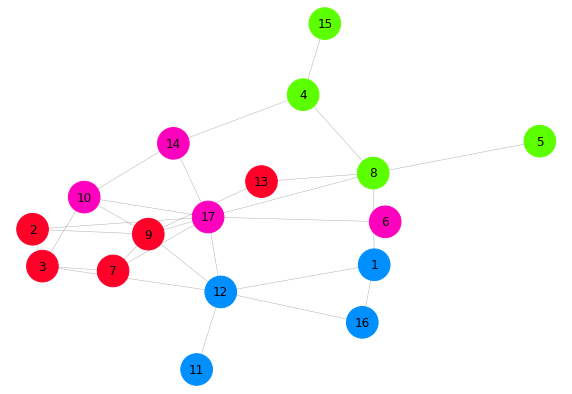

In [12]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_li = nx.Graph(Adj2_li)
pos_li = nx.spring_layout(G_li)
c_li = list(greedy_modularity_communities(G_li))  
k_star_li = len(c_li)    #get the number of communities
print('The optimal number k* of communities is', k_star_li)

comm_li = [list(x) for x in c_li]  #create an array with lists of the nodes in each community

partitions_li = []
for i in range(17):
    for j in range(k_star_li):
        if i in comm_li[j]:
            partitions_li.append(j)

#plot
plot_communities_nx(G_li, partitions_li, pos_li)

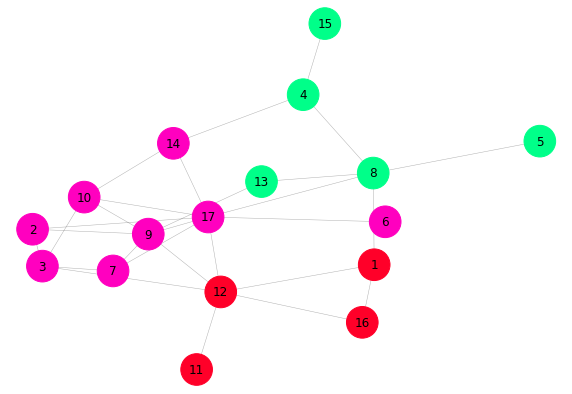

In [13]:
partitions_li_l = community_louvain.best_partition(G_li)

plot_communities_nx(G_li, list(partitions_li_l.values()), pos_li)

100%|██████████| 50/50 [00:00<00:00, 150.35it/s]


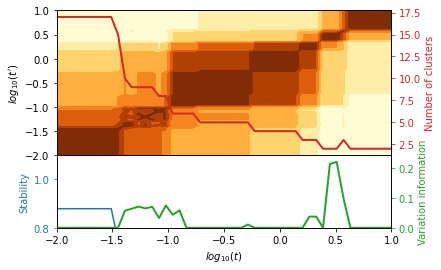

<Figure size 432x288 with 0 Axes>

In [14]:
A_li = sp.csr_matrix(Adj2_li)

results_nx_li = pgs.run(A_li, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_nx_li)
plt.figure()
plt.show()

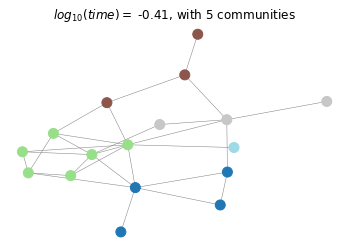

In [15]:
for u in G_li:
    G_li.nodes[u]["pos"] = pos_li[u]

plotting.plot_single_community(G_li, results_nx_li,26)

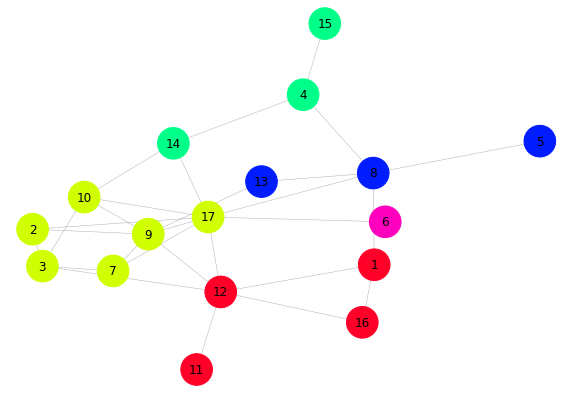

In [17]:
plot_communities_nx(G_li, results_nx_li["community_id"][26], pos_li)

## Lower middle income

The optimal number k* of communities is 3


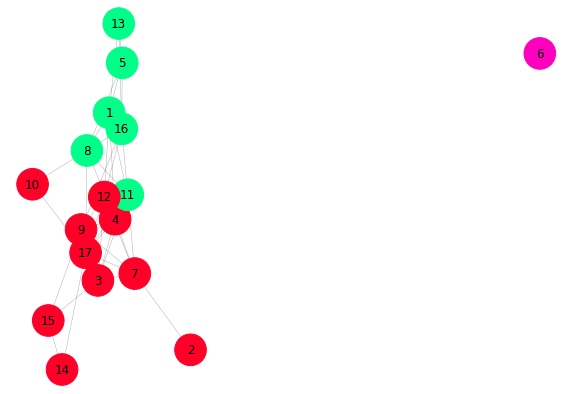

In [18]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_lmi = nx.Graph(Adj2_lmi)
pos_lmi = nx.spring_layout(G_lmi)
c_lmi = list(greedy_modularity_communities(G_lmi))  
k_star_lmi = len(c_lmi)    #get the number of communities
print('The optimal number k* of communities is', k_star_lmi)

comm_lmi = [list(x) for x in c_lmi]  #create an array with lists of the nodes in each community

partitions_lmi = []
for i in range(17):
    for j in range(k_star_lmi):
        if i in comm_lmi[j]:
            partitions_lmi.append(j)

#plot
plot_communities_nx(G_lmi, partitions_lmi, pos_lmi)

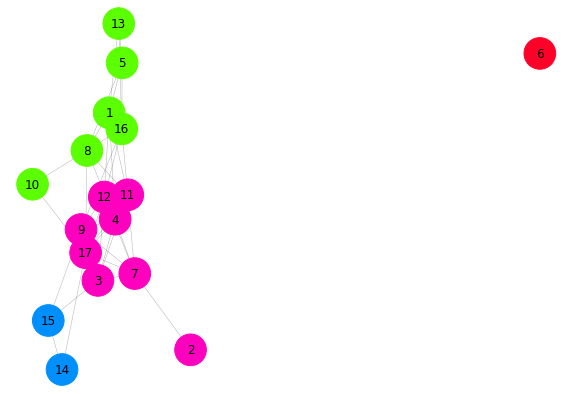

In [19]:
partitions_lmi_l = community_louvain.best_partition(G_lmi)

plot_communities_nx(G_lmi, list(partitions_lmi_l.values()), pos_lmi)

In [54]:
n_labels_6 = {}
for i in range(5):
    n_labels_6[i] = i+1
for i in range(5,16):
    n_labels_6[i] = i+2

In [46]:
Adj2_lmi_6 = Adj2_lmi[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16],:][:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16]]
G_lmi_6 = nx.Graph(Adj2_lmi_6)
pos_lmi_6 = nx.spring_layout(G_lmi_6)

100%|██████████| 50/50 [00:00<00:00, 207.94it/s]


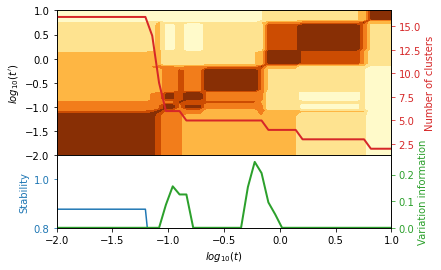

<Figure size 432x288 with 0 Axes>

In [47]:
A_lmi_6 = sp.csr_matrix(Adj2_lmi_6)
results_nx_lmi = pgs.run(A_lmi_6, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_nx_lmi)
plt.figure()
plt.show()

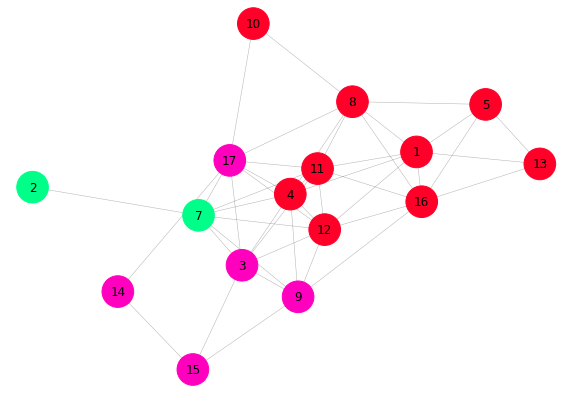

In [56]:
plot_communities_nx(G_lmi_6, results_nx_lmi["community_id"][39], pos_lmi_6, labels=n_labels_6)

## Upper middle income

The optimal number k* of communities is 4


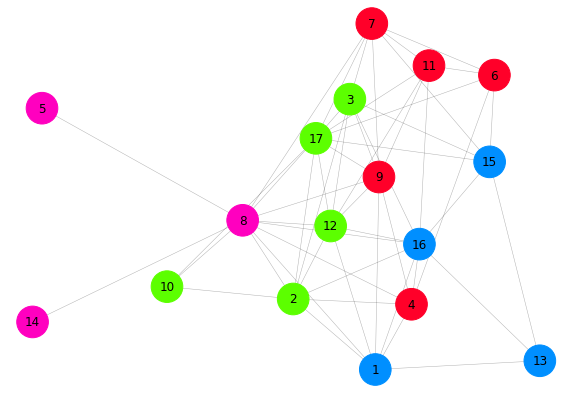

In [77]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_umi = nx.Graph(Adj2_umi)
pos_umi = nx.spring_layout(G_umi)
c_umi = list(greedy_modularity_communities(G_umi))  
k_star_umi = len(c_umi)    #get the number of communities
print('The optimal number k* of communities is', k_star_umi)

comm_umi = [list(x) for x in c_umi]  #create an array with lists of the nodes in each community

partitions_umi = []
for i in range(17):
    for j in range(k_star_umi):
        if i in comm_umi[j]:
            partitions_umi.append(j)

#plot
plot_communities_nx(G_umi, partitions_umi, pos_umi)

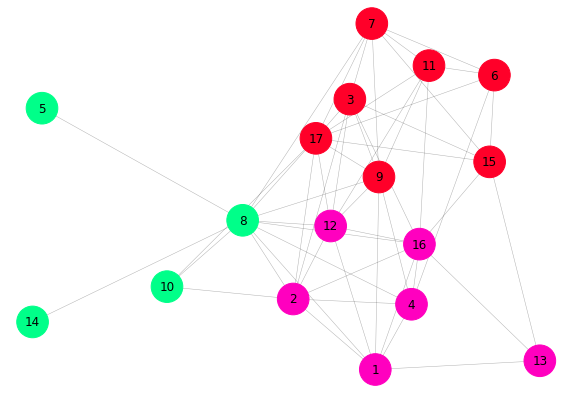

In [78]:
partitions_umi_l = community_louvain.best_partition(G_umi)

plot_communities_nx(G_umi, list(partitions_umi_l.values()), pos_umi)

100%|██████████| 50/50 [00:00<00:00, 269.05it/s]


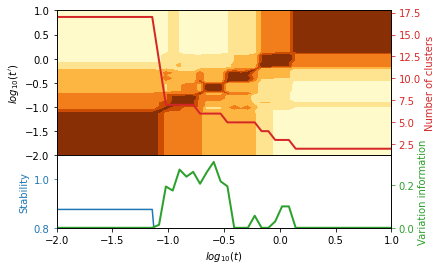

<Figure size 432x288 with 0 Axes>

In [79]:
A_umi = sp.csr_matrix(Adj2_umi)

results_nx_umi = pgs.run(A_umi, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_nx_umi)
plt.figure()
plt.show()

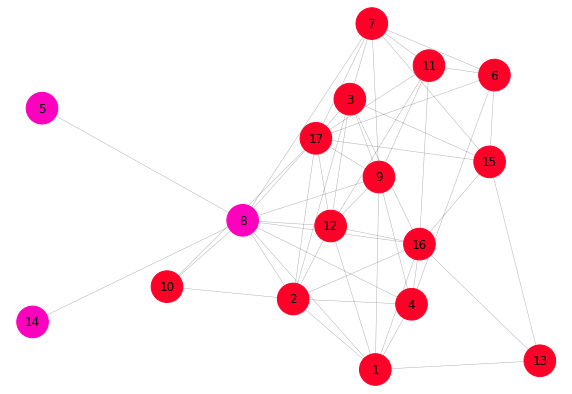

In [80]:
plot_communities_nx(G_umi, results_nx_umi["community_id"][35], pos_umi)

## High Income

The optimal number k* of communities is 2


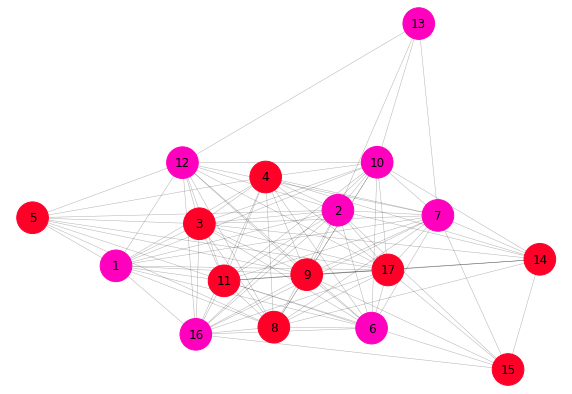

In [81]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_hi = nx.Graph(Adj2_hi)
pos_hi = nx.spring_layout(G_hi)
c_hi = list(greedy_modularity_communities(G_hi))  
k_star_hi = len(c_hi)    #get the number of communities
print('The optimal number k* of communities is', k_star_hi)

comm_hi = [list(x) for x in c_hi]  #create an array with lists of the nodes in each community

partitions_hi = []
for i in range(17):
    for j in range(k_star_hi):
        if i in comm_hi[j]:
            partitions_hi.append(j)

#plot
plot_communities_nx(G_hi, partitions_hi, pos_hi)

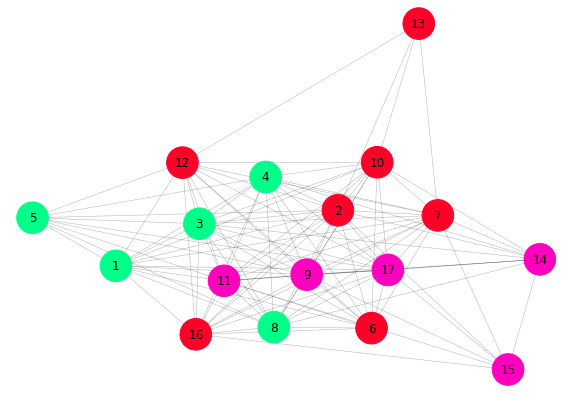

In [82]:
partitions_hi_l = community_louvain.best_partition(G_hi)

plot_communities_nx(G_hi, list(partitions_hi_l.values()), pos_hi)

100%|██████████| 50/50 [00:00<00:00, 279.10it/s]


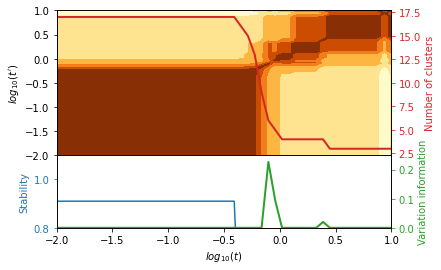

<Figure size 432x288 with 0 Axes>

In [83]:
A_hi = sp.csr_matrix(Adj2_hi)

results_nx_hi = pgs.run(A_hi, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_nx_hi)
plt.figure()
plt.show()

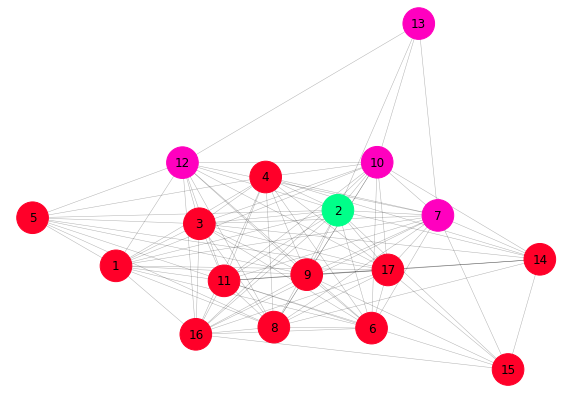

In [84]:
plot_communities_nx(G_hi, results_nx_hi["community_id"][41], pos_hi)

# Network with weights


In [65]:
# CHECKPOINT
Aw_li = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_li.pkl', 'rb'))
Aw_lmi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_lmi.pkl', 'rb'))
Aw_umi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_umi.pkl', 'rb'))
Aw_hi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_hi.pkl', 'rb'))

## Low Income

The optimal number k* of communities is 7


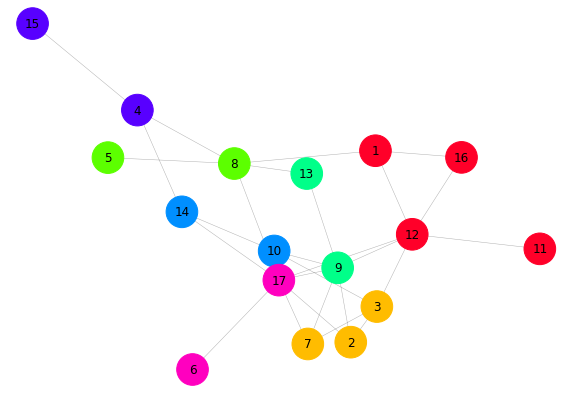

In [85]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_w_li = nx.Graph(Aw_li)
pos_w_li = nx.spring_layout(G_w_li)
c_w_li = list(greedy_modularity_communities(G_w_li))  
k_star_w_li = len(c_w_li)    #get the number of communities
print('The optimal number k* of communities is', k_star_w_li)

comm_w_li = [list(x) for x in c_w_li]  #create an array with lists of the nodes in each community

partitions_w_li = []
for i in range(17):
    for j in range(k_star_w_li):
        if i in comm_w_li[j]:
            partitions_w_li.append(j)

#plot
plot_communities_nx(G_w_li, partitions_w_li, pos_w_li)

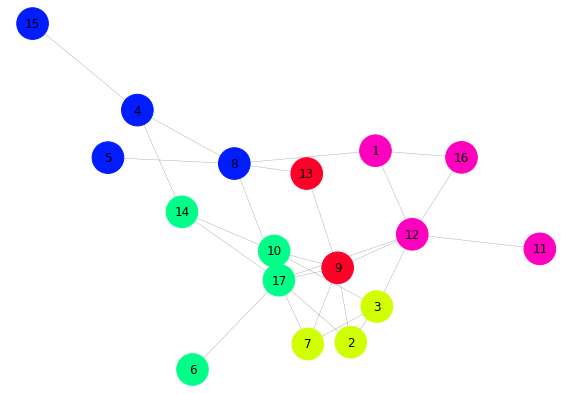

In [86]:
partitions_w_li_l = community_louvain.best_partition(G_w_li)

plot_communities_nx(G_w_li, list(partitions_w_li_l.values()), pos_w_li)

100%|██████████| 50/50 [00:00<00:00, 160.34it/s]


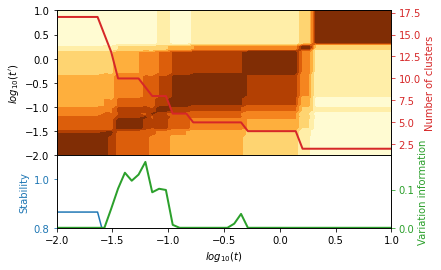

<Figure size 432x288 with 0 Axes>

In [87]:
Aw_li_sp = sp.csr_matrix(Aw_li)

results_nx_w_li = pgs.run(Aw_li_sp, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_nx_w_li)
plt.figure()
plt.show()

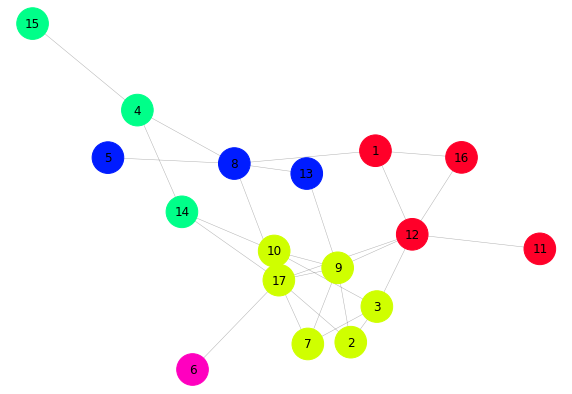

In [89]:
plot_communities_nx(G_w_li, results_nx_w_li["community_id"][22], pos_w_li)

## Upper Middle Income

The optimal number k* of communities is 9


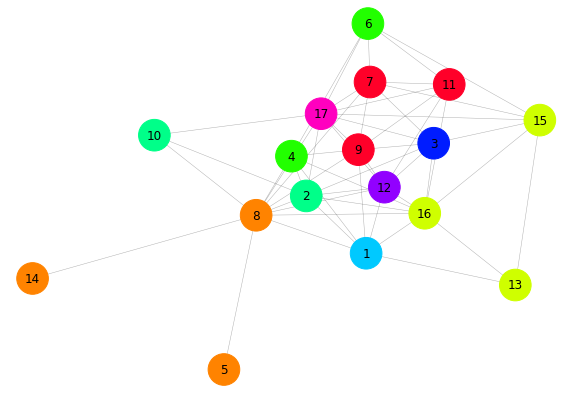

In [88]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_w_umi = nx.Graph(Aw_umi)
pos_w_umi = nx.spring_layout(G_w_umi)
c_w_umi = list(greedy_modularity_communities(G_w_umi))  
k_star_w_umi = len(c_w_umi)    #get the number of communities
print('The optimal number k* of communities is', k_star_w_umi)

comm_w_umi = [list(x) for x in c_w_umi]  #create an array with lists of the nodes in each community

partitions_w_umi = []
for i in range(17):
    for j in range(k_star_w_umi):
        if i in comm_w_umi[j]:
            partitions_w_umi.append(j)

#plot
plot_communities_nx(G_w_umi, partitions_w_umi, pos_w_umi)

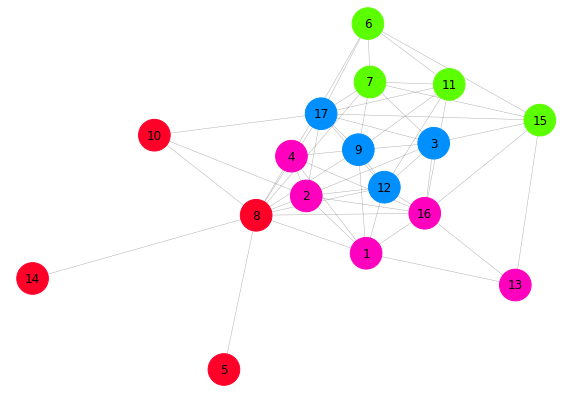

In [90]:
partitions_w_umi_l = community_louvain.best_partition(G_w_umi)

plot_communities_nx(G_w_umi, list(partitions_w_umi_l.values()), pos_w_umi)

100%|██████████| 50/50 [00:00<00:00, 148.93it/s]


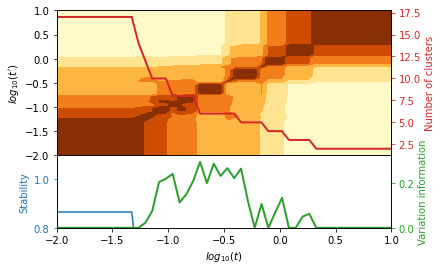

<Figure size 432x288 with 0 Axes>

In [91]:
Aw_umi_sp = sp.csr_matrix(Aw_umi)

results_nx_w_umi = pgs.run(Aw_umi_sp, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_nx_w_umi)
plt.figure()
plt.show()

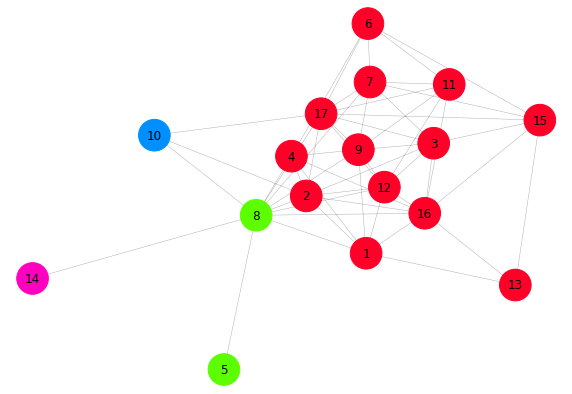

In [92]:
plot_communities_nx(G_w_umi, results_nx_w_umi["community_id"][31], pos_w_umi)

## High Income

The optimal number k* of communities is 15


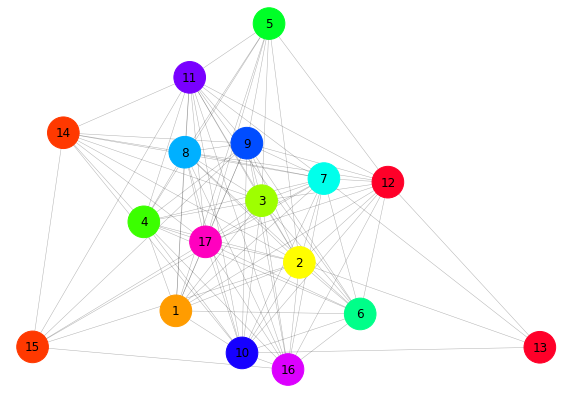

In [93]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_w_hi = nx.Graph(Aw_hi)
pos_w_hi = nx.spring_layout(G_w_hi)
c_w_hi = list(greedy_modularity_communities(G_w_hi))  
k_star_w_hi = len(c_w_hi)    #get the number of communities
print('The optimal number k* of communities is', k_star_w_hi)

comm_w_hi = [list(x) for x in c_w_hi]  #create an array with lists of the nodes in each community

partitions_w_hi = []
for i in range(17):
    for j in range(k_star_w_hi):
        if i in comm_w_hi[j]:
            partitions_w_hi.append(j)

#plot
plot_communities_nx(G_w_hi, partitions_w_hi, pos_w_hi)

# Hypergraph

In [94]:
H_li = hnx.Hypergraph(edges_li)

graph_li = sp.csr_matrix(get_adjacency(H_li))

# construct network object just for plotting
g_li = nx.Graph(graph_li)
pos_li_h = nx.circular_layout(g_li, scale=1)
for u in g_li:
    g_li.nodes[u]["pos"] = pos_li_h[u]

In [95]:
H_li.nodes

EntitySet(_:Nodes,['5', '7', '3', '2', '4', '1', '14', '10', '15', '6', '9', '17', '11', '12', '13', '16', '8'],{})

In [96]:
n_labels_li = {}
nodes_li = ['5', '7', '3', '2', '4', '1', '14', '10', '15', '6', '9', '17', '11', '12', '13', '16', '8']
for i in range(len(nodes_li)):
    n_labels_li[i] = nodes_li[i]

100%|██████████| 50/50 [00:00<00:00, 242.03it/s]


<Figure size 432x288 with 0 Axes>

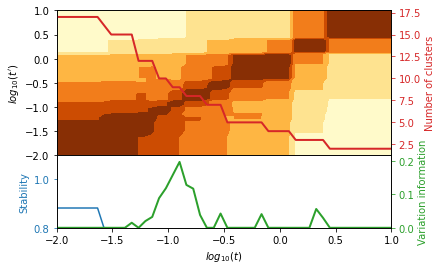

<Figure size 432x288 with 0 Axes>

In [97]:
graph_li = graph_li.astype(np.float64)

results_hg_li = pgs.run(graph_li, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_hg_li)
plt.figure()


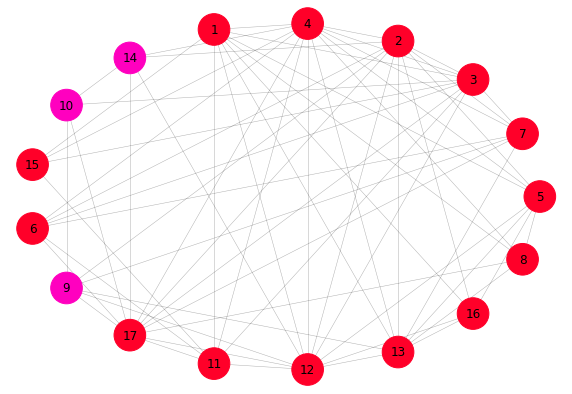

In [98]:
plot_communities_nx(g_li, results_hg_li["community_id"][40], pos_li_h, labels=n_labels_li)

# Restrict to 3 edges

## Low income

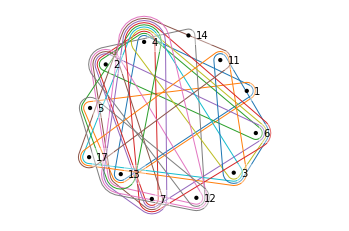

In [99]:
Hli_restrict_edges3 = H_li.restrict_to_edges(list(e for e in edges_li if len(edges_li[e])==3))
hnx.draw(Hli_restrict_edges3, pos=nx.spring_layout(Hli_restrict_edges3), with_edge_labels=False)

In [100]:
graph_li3 = sp.csr_matrix(get_adjacency(Hli_restrict_edges3))

# construct network object just for plotting
g_li3 = nx.Graph(graph_li3)
pos_li_h3 = nx.spring_layout(g_li3, scale=1)
for u in g_li3:
    g_li3.nodes[u]["pos"] = pos_li_h3[u]

In [101]:
Hli_restrict_edges3.nodes

EntitySet(_:Nodes,['5', '4', '14', '2', '6', '12', '3', '17', '11', '7', '13', '1'],{})

In [102]:
n_labels_li3 = {}
nodes_li3 = ['5', '4', '14', '2', '6', '12', '3', '17', '11', '7', '13', '1']
for i in range(len(nodes_li3)):
    n_labels_li3[i] = nodes_li3[i]

100%|██████████| 50/50 [00:00<00:00, 230.56it/s]


<Figure size 432x288 with 0 Axes>

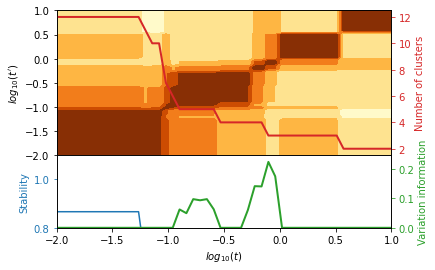

<Figure size 432x288 with 0 Axes>

In [103]:
graph_li3 = graph_li3.astype(np.float64)

results_hg_li3 = pgs.run(graph_li3, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_hg_li3)
plt.figure()

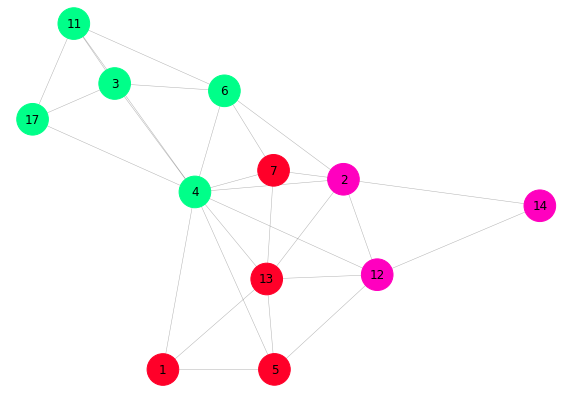

In [104]:
plot_communities_nx(g_li3, results_hg_li3["community_id"][34], pos_li_h3, labels=n_labels_li3)

## Lower Middle Income

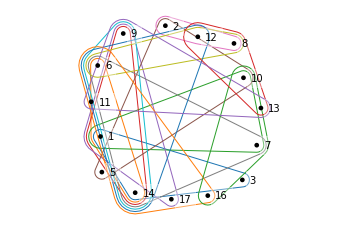

In [106]:
H_lmi = hnx.Hypergraph(edges_lmi)

Hlmi_restrict_edges3 = H_lmi.restrict_to_edges(list(e for e in edges_lmi if len(edges_lmi[e])==3))
hnx.draw(Hlmi_restrict_edges3, pos=nx.spring_layout(Hlmi_restrict_edges3), with_edge_labels=False)

In [107]:
graph_lmi3 = sp.csr_matrix(get_adjacency(Hlmi_restrict_edges3))

# construct network object just for plotting
g_lmi3 = nx.Graph(graph_lmi3)
pos_lmi_h3 = nx.spring_layout(g_lmi3, scale=1)
for u in g_lmi3:
    g_lmi3.nodes[u]["pos"] = pos_lmi_h3[u]
    
Hlmi_restrict_edges3.nodes

EntitySet(_:Nodes,['5', '14', '3', '2', '6', '12', '10', '9', '17', '8', '11', '7', '13', '16', '1'],{})

In [108]:
n_labels_lmi3 = {}
nodes_lmi3 = ['5', '14', '3', '2', '6', '12', '10', '9', '17', '8', '11', '7', '13', '16', '1']
for i in range(len(nodes_lmi3)):
    n_labels_lmi3[i] = nodes_lmi3[i]

100%|██████████| 50/50 [00:00<00:00, 280.16it/s]


<Figure size 432x288 with 0 Axes>

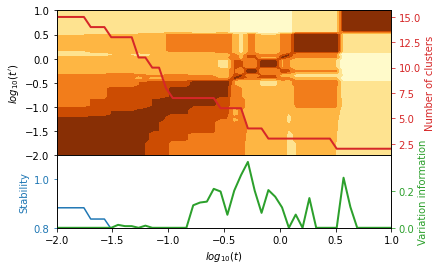

<Figure size 432x288 with 0 Axes>

In [109]:
graph_lmi3 = graph_lmi3.astype(np.float64)

results_hg_lmi3 = pgs.run(graph_lmi3, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_hg_lmi3)
plt.figure()

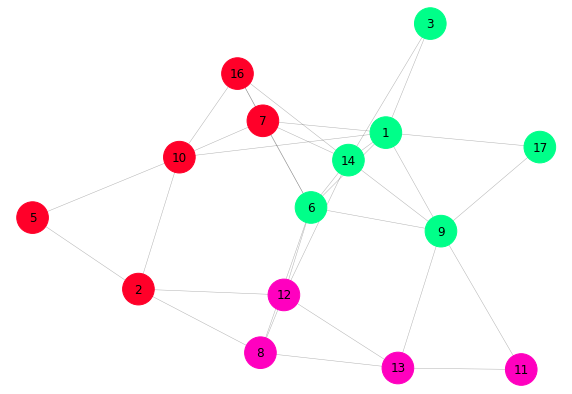

In [110]:
plot_communities_nx(g_lmi3, results_hg_lmi3["community_id"][38], pos_lmi_h3, labels=n_labels_lmi3)